In [1]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from intfeat import powerlaw_weight, powerlaw_gram_matrix, OrthPowerlawBasis


# Define atoms

In [2]:
def atoms(xs, poles):
    poles = poles.reshape(1, -1)
    xs = xs.reshape(-1, 1)
    zs = xs / (1 - xs / poles) / np.abs(poles)
    bs = np.c_[np.ones(np.size(xs)), np.cumprod(zs, axis=1)]
    return bs

In [3]:
poles = -2 ** np.arange(4)
xs = np.arange(50)
vander = atoms(xs, poles)

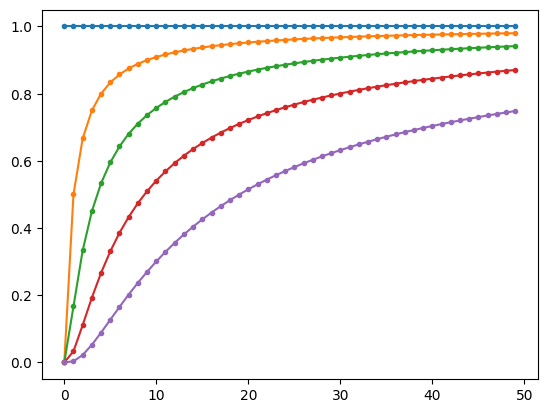

In [4]:
plt.plot(vander, marker='o', markersize=3)
plt.show()

# Analyze atoms orthogonality

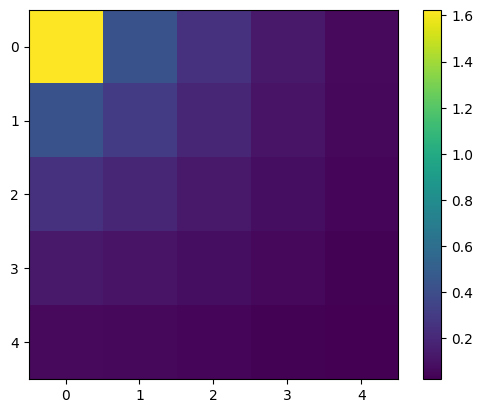

In [5]:
plt.imshow(powerlaw_gram_matrix(vander, alpha=1, beta=1))
plt.colorbar()
plt.show()

In [6]:
np.linalg.svdvals(powerlaw_gram_matrix(vander, alpha=1, beta=1))

array([1.82063470e+00, 2.93808556e-01, 2.62770602e-02, 1.31498575e-03,
       2.45680855e-05])

# Analyze atoms gram matrix with more poles

In [7]:
poles = -2 ** np.arange(12)
vander = atoms(np.arange(2**16), poles)

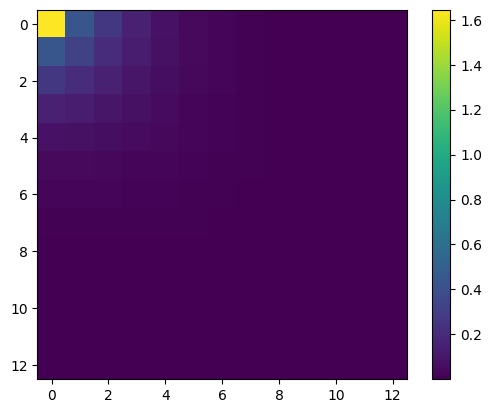

In [8]:
plt.imshow(powerlaw_gram_matrix(vander, alpha=1, beta=1))
plt.colorbar()
plt.show()

In [9]:
np.linalg.svdvals(powerlaw_gram_matrix(vander, alpha=1, beta=1))

array([1.87074441e+00, 3.36260514e-01, 4.99685927e-02, 9.14023622e-03,
       2.02491721e-03, 4.96181284e-04, 1.20874072e-04, 2.70574605e-05,
       5.38836023e-06, 9.39877806e-07, 1.40114742e-07, 1.68121967e-08,
       1.31894974e-09])

# Create orthogonal basis

In [10]:
poles = -2 ** np.arange(-1, 8).astype(float)
basis = OrthPowerlawBasis(lambda xs: atoms(xs, poles))

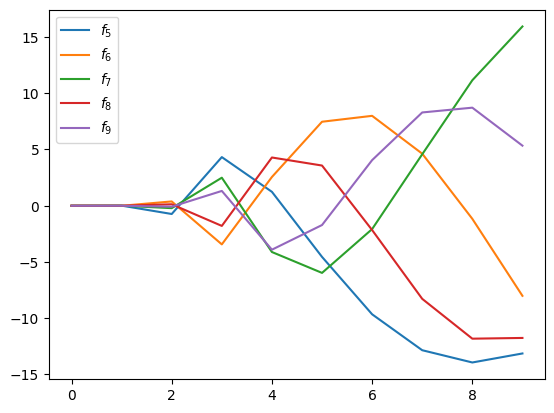

In [11]:
xs = np.arange(10)
vander = basis.vander(xs)
for i in range(5, vander.shape[1]):
    plt.plot(xs, vander[:, i], label=f'$f_{i}$')
plt.legend()
plt.show()

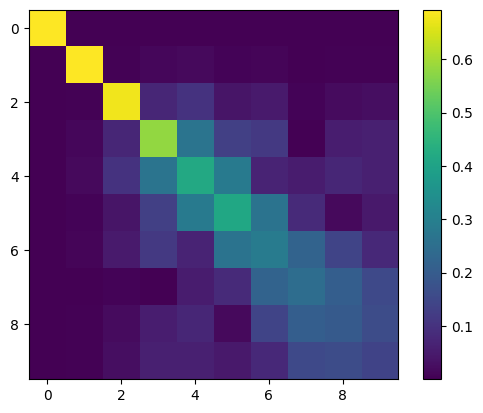

In [12]:
plt.imshow(np.log1p(np.abs(powerlaw_gram_matrix(vander, basis.alpha, basis.beta))))
plt.colorbar()
plt.show()